# Run the pytorch to trian the model

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 15th 2021

@author: HY
"""
import itertools

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

from torch.autograd import Variable

transform = transforms.Compose(
    [transforms.Resize((50,50)), transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.ImageFolder(root = './drive/MyDrive/Course/ece5532/final_project/dataset', transform=transform)


train_length = 0.8 * len( trainset )
train_length = int(train_length)

test_length = len( trainset ) - train_length
test_length = int(test_length)

train_data, test_data = torch.utils.data.random_split(trainset, (train_length, test_length))
batchsize = 6

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batchsize,
                                          shuffle=True )
testloader = torch.utils.data.DataLoader(test_data, batch_size=batchsize,
                                         shuffle=False )

NO_classes = 5

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 2)
        self.fc1 = nn.Linear(1936 , 400)
        self.fc2 = nn.Linear(400, 100)
        self.fc3 = nn.Linear(100, NO_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view( x.size(0), -1 )
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

# define a loss fucntion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), 0.001)
#SGD(net.parameters(), lr=0.001, momentum=0.5)

# Train the network, train for how many times
for epoch in range(6):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = Variable(inputs)
        labels = Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        
        running_loss += loss.item()
        if i % 10 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0
        

print('Finished Training')




[1,     1] loss: 0.160
[1,    11] loss: 1.626
[1,    21] loss: 1.514
[1,    31] loss: 1.360
[1,    41] loss: 1.056
[1,    51] loss: 0.820
[1,    61] loss: 0.719
[2,     1] loss: 0.062
[2,    11] loss: 0.349
[2,    21] loss: 0.410
[2,    31] loss: 0.285
[2,    41] loss: 0.210
[2,    51] loss: 0.353
[2,    61] loss: 0.322
[3,     1] loss: 0.011
[3,    11] loss: 0.115
[3,    21] loss: 0.115
[3,    31] loss: 0.086
[3,    41] loss: 0.026
[3,    51] loss: 0.039
[3,    61] loss: 0.018
[4,     1] loss: 0.000
[4,    11] loss: 0.016
[4,    21] loss: 0.010
[4,    31] loss: 0.036
[4,    41] loss: 0.007
[4,    51] loss: 0.010
[4,    61] loss: 0.004
[5,     1] loss: 0.000
[5,    11] loss: 0.005
[5,    21] loss: 0.011
[5,    31] loss: 0.003
[5,    41] loss: 0.004
[5,    51] loss: 0.002
[5,    61] loss: 0.002
[6,     1] loss: 0.000
[6,    11] loss: 0.001
[6,    21] loss: 0.002
[6,    31] loss: 0.001
[6,    41] loss: 0.001
[6,    51] loss: 0.001
[6,    61] loss: 0.001
Finished Training


# Save the model weight to a given path

In [ ]:
PATH = '/content/drive/MyDrive/Course/ece5532/final_project/handGesture.pth'
torch.save(net.state_dict(), PATH)

# Below codes are the test of the trained CNN

Accuracy of the network on the 10000 test images: 100 %
Accuracy of  flow : 100 %
Accuracy of  left : 100 %
Accuracy of    ok : 100 %
Accuracy of right : 100 %
Accuracy of  stop : 100 %
Normalized confusion matrix
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


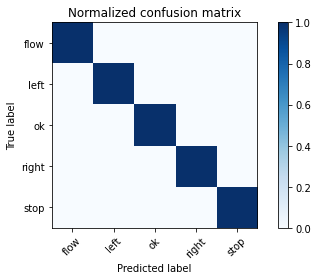

In [ ]:
# test the net work
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


classes = trainset.classes
class_correct = list(0. for i in range( len(trainset.classes) ))
class_total = list(0. for i in range( len(trainset.classes) ))
Confusion_mat = np.zeros( (NO_classes, NO_classes) ) # define the confusion matrix

with torch.no_grad():
    for data in testloader:
        images, labels = data
        #print(labels)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        #print(predicted)
        c = (predicted == labels).squeeze()
        for i in range( len(predicted) ): # the confusion matrix
            Confusion_mat[ labels[i].item() ][ predicted[i].item() ] += 1
        
        for i in range( len(labels) ):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range( len(trainset.classes) ):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    
    
def plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    '''
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        '''
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plot_confusion_matrix(Confusion_mat, classes=classes, normalize=True,
                      title='Normalized confusion matrix')


# Below codes are loading the saved model parameter

In [ ]:
import itertools

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

from torch.autograd import Variable

PATH = '/content/drive/MyDrive/Course/ece5532/final_project/handGesture.pth'

NO_classes = 4

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 2)
        self.fc1 = nn.Linear(1936 , 400)
        self.fc2 = nn.Linear(400, 100)
        self.fc3 = nn.Linear(100, NO_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view( x.size(0), -1 )
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
from PIL import Image 
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.Resize((50,50)), transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

image = Image.open("/content/drive/MyDrive/Course/ece5532/final_project/dataset/flow/fist_0.png") 
image = transform(image)

image = image.unsqueeze(0)

outputs = net(image)
print(outputs)
_, predicted = torch.max(outputs, 1)
classes = ['left', 'palm', 'peace', 'right']
print( classes[ predicted.numpy()[0] ] )

RuntimeError: ignored

tensor([[-4.4184,  3.2590, -2.7641,  0.3267]], grad_fn=<AddmmBackward>)


Below will be the test of the Net()